# 📊 Bugatti Car Sales Data Analysis


First 5 rows:
   id       date                         car seat_color car_color  \
0   1   2017-1-4  Ferrari Pininfarina Sergio      brown      blue   
1   2  2017-1-16               McLaren P1 LM        red     black   
2   3  2017-1-12  Ferrari Pininfarina Sergio      black    silver   
3   4   2017-1-9              Bugatti Chiron      brown      gold   
4   5  2017-1-10    Bugatti La Voiture Noire      black     white   

   value (US$ mi)  value off (US$ mi)  discount (%)  total (US$ mi)  \
0        2.315250            2.290760             3        2.222037   
1        2.719500            2.686197             1        2.659335   
2        2.205000            2.184845             1        2.162997   
3        2.238075            2.211546             2        2.167315   
4       13.351800           13.151793             1       13.020275   

  salesperson       city country  
0      Sophia  sao paulo  brazil  
1      Sophia  sao paulo  brazil  
2      Helena  sao paulo  brazil  
3   

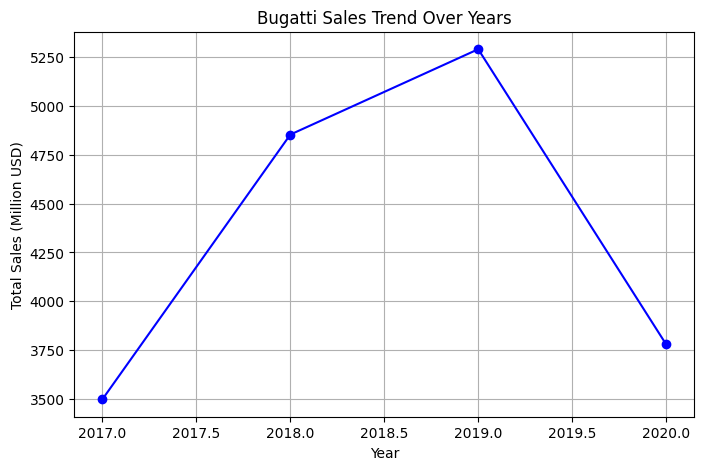

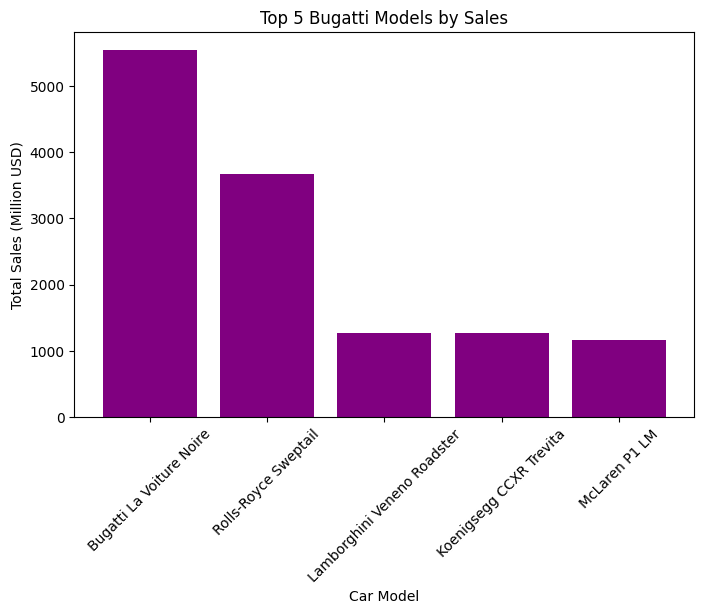

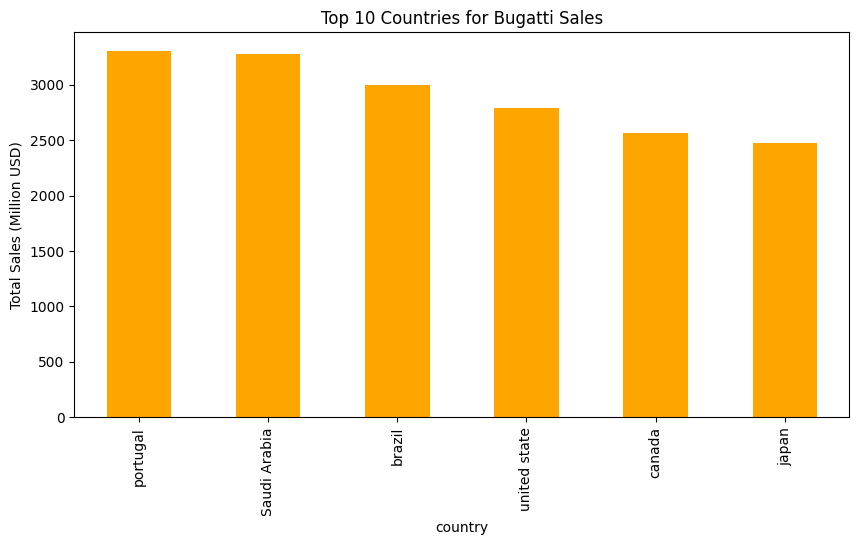

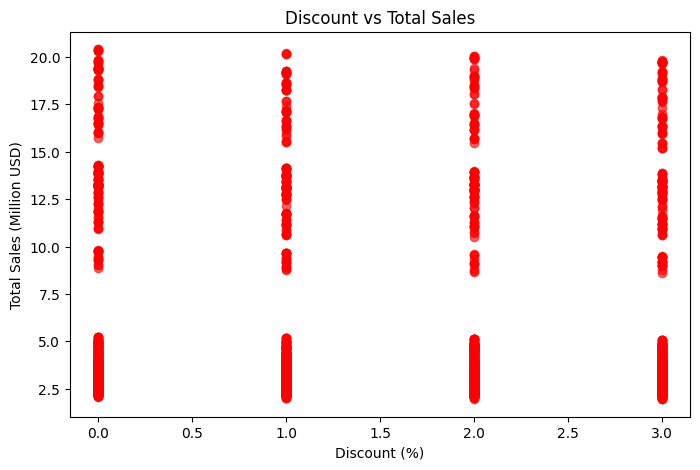

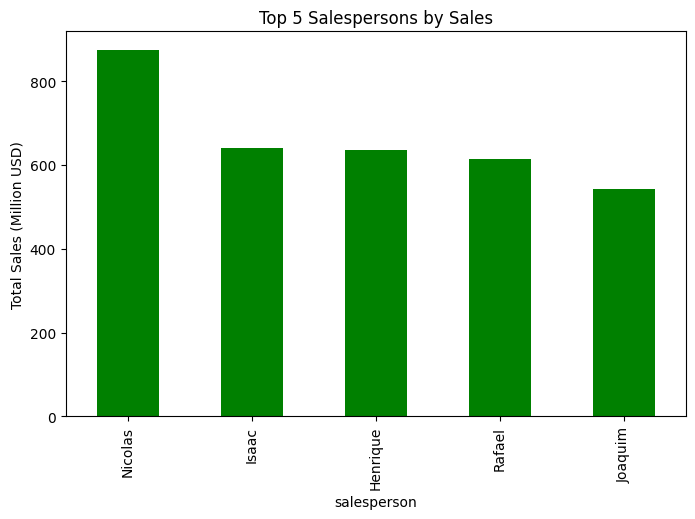

In [6]:
# Bugatti Car Sales Analysis with Pandas + Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Step 1: Load Dataset
# ===============================
df = pd.read_csv("topCarsSales-v2 (1).csv")

print("First 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())

# ===============================
# Step 2: Data Cleaning
# ===============================
# Convert date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert numeric columns
df['value (US$ mi)'] = pd.to_numeric(df['value (US$ mi)'], errors='coerce')
df['value off (US$ mi)'] = pd.to_numeric(df['value off (US$ mi)'], errors='coerce')
df['total (US$ mi)'] = pd.to_numeric(df['total (US$ mi)'], errors='coerce')
df['discount (%)'] = pd.to_numeric(df['discount (%)'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# ===============================
# Step 3: Sales Trend Over Years
# ===============================
sales_trend = df.groupby(df['date'].dt.year)['total (US$ mi)'].sum()

plt.figure(figsize=(8,5))
plt.plot(sales_trend.index, sales_trend.values, marker='o', color='blue')
plt.title("Bugatti Sales Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales (Million USD)")
plt.grid(True)
plt.show()

# ===============================
# Step 4: Top Models by Sales
# ===============================
top_models = df.groupby('car')['total (US$ mi)'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.bar(top_models.index, top_models.values, color='purple')
plt.title("Top 5 Bugatti Models by Sales")
plt.xlabel("Car Model")
plt.ylabel("Total Sales (Million USD)")
plt.xticks(rotation=45)
plt.show()

# ===============================
# Step 5: Sales by Country
# ===============================
country_sales = df.groupby('country')['total (US$ mi)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
country_sales.plot(kind='bar', color='orange')
plt.title("Top 10 Countries for Bugatti Sales")
plt.ylabel("Total Sales (Million USD)")
plt.show()

# ===============================
# Step 6: Discounts vs Revenue
# ===============================
plt.figure(figsize=(8,5))
plt.scatter(df['discount (%)'], df['total (US$ mi)'], alpha=0.6, color='red')
plt.title("Discount vs Total Sales")
plt.xlabel("Discount (%)")
plt.ylabel("Total Sales (Million USD)")
plt.show()

# ===============================
# Step 7: Top Salespersons
# ===============================
top_salesperson = df.groupby('salesperson')['total (US$ mi)'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_salesperson.plot(kind='bar', color='green')
plt.title("Top 5 Salespersons by Sales")
plt.ylabel("Total Sales (Million USD)")
plt.show()
